<a href="https://colab.research.google.com/github/kunwarp29/Vaccine_slot_alert_Bot/blob/main/final_project_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r /content/drive/MyDrive/Palmprint1 '/content'

In [ ]:
!cp -r '/content/drive/MyDrive/IITD Palmprint V1.zip' '/content'

In [ ]:
!unzip -q '/content/IITD Palmprint V1.zip'

In [ ]:
!du -sh '/content/IITD Palmprint V1'

2.0G	/content/IITD Palmprint V1


In [ ]:
!pip install tensorflow==1.14


     |████████████████████████████████| 109.3MB 102kB/s 
     |████████████████████████████████| 491kB 35.5MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 3.2MB 32.5MB/s 
ERROR: kapre 0.3.5 has requirement tensorflow>=2.0.0, but you'll have tensorflow 1.14.0 which is incompatible.
  Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Found existing installation: tensorboard 2.5.0
    Uninstalling tensorboard-2.5.0:
      Successfully uninstalled tensorboard-2.5.0
  Found existing installation: tensorflow 2.5.0
    Uninstalling tensorflow-2.5.0:
      Successfully uninstalled tensorflow-2.5.0


In [ ]:
!pip install scipy==1.2.2


     |████████████████████████████████| 24.8MB 125kB/s 
ERROR: kapre 0.3.5 has requirement tensorflow>=2.0.0, but you'll have tensorflow 1.14.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


In [ ]:
 !pip install Image


     |████████████████████████████████| 7.9MB 7.3MB/s 
  Created wheel for Image: filename=image-1.5.33-py2.py3-none-any.whl size=19495 sha256=6cd7b1f765ac1d9167c1301f9123c649588415605c2aed6dd0014c539c25c384
  Stored in directory: /root/.cache/pip/wheels/87/4c/60/d5904e69c837fcdea7e03ffa0c657f35ced7e398c6f3ca17cc
Successfully built Image


In [ ]:
!pip install pillow

uint8
(1200, 1600, 3)


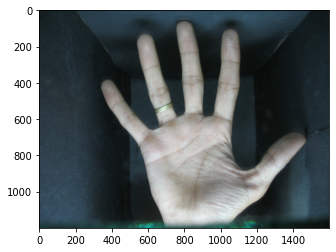

In [ ]:
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
image = image.imread('/content/IITD Palmprint V1/Left Hand/001_2.JPG')
# summarize shape of the pixel array
print(image.dtype)
print(image.shape)
# display the array of pixels as an image
pyplot.imshow(image)
pyplot.show()

** Local image normalization test**


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: DeprecationWarning:     `imresize` is deprecated!
    `imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
    Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DeprecationWarning:     `imresize` is deprecated!
    `imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
    Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


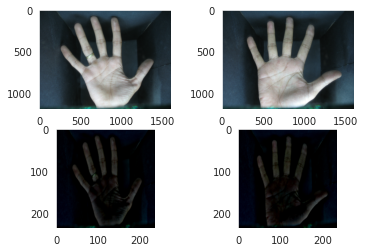

In [ ]:
%matplotlib inline
import os
import imageio
import scipy.ndimage
import os
from os import listdir
from PIL import Image


import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import sys

sys.path.insert(0,'/content/Palmprint1/libs')

#import Utils.datasets as datasets
    
def localNormalize(img, mean, std, eps = 0.1):
    meanVals = sp.ndimage.gaussian_filter(img, mean)
    imgCent = img - meanVals
    stdVals = np.sqrt(sp.ndimage.gaussian_filter(imgCent**2, std))
    return imgCent / (stdVals + eps)

targetDim = (236, 236)

img1 = imageio.imread(os.path.join('/content/IITD Palmprint V1/Left Hand', '001_1.JPG')) 
anImage1 = sp.misc.imresize(img1, targetDim)
anImage1 = anImage1 / np.float32(256)
anImage1 = localNormalize(anImage1, 7, 7, eps = 1.0)

img2 = imageio.imread(os.path.join('/content/IITD Palmprint V1/Left Hand', '002_1.JPG')) 
anImage2 = sp.misc.imresize(img2, targetDim)
anImage2 = anImage2 / np.float32(256)
anImage2 = localNormalize(anImage2, 7, 7, eps = 1.0)

    
fig = plt.figure()
sns.set_style('dark')
plt.set_cmap('gray')
#plt.colorbar()
fig.add_subplot(221)
plt.imshow(img1)
fig.add_subplot(222)
plt.imshow(img2)
fig.add_subplot(223)
plt.imshow(anImage1)
fig.add_subplot(224)
plt.imshow(anImage2)


In [ ]:
import PIL
print('Pillow Version:', PIL.__version__)

Pillow Version: 7.1.2


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [ ]:
def show(img):
    plt.imshow(img, cmap='gray')
    plt.xticks([])
    plt.yticks([])

ROI

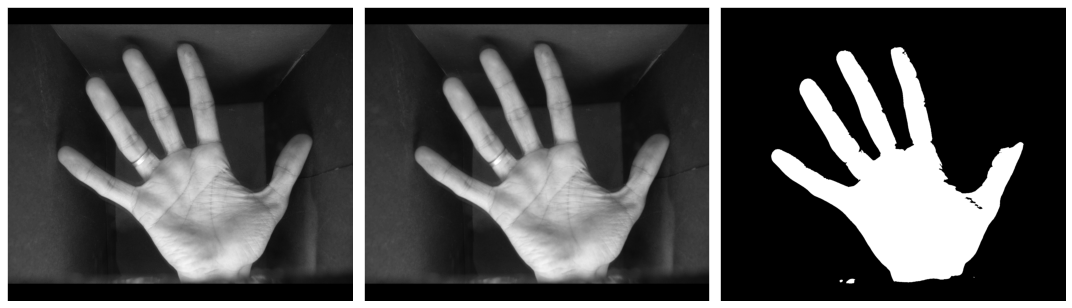

In [ ]:
img_original = cv2.imread('/content/IITD Palmprint V1/Left Hand/001_3.JPG', 0)      #Image is blurred and mask is extracted using Otsu Binarization.

h, w = img_original.shape
img = np.zeros((h+160,w), np.uint8)
img[80:-80,:] = img_original
plt.figure(figsize=(15,5))
plt.subplot(131)
show(img)
blur = cv2.GaussianBlur(img,(5,5),0)
plt.subplot(132)
show(blur)
_, th = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.subplot(133)
show(th)
plt.tight_layout()
plt.show()

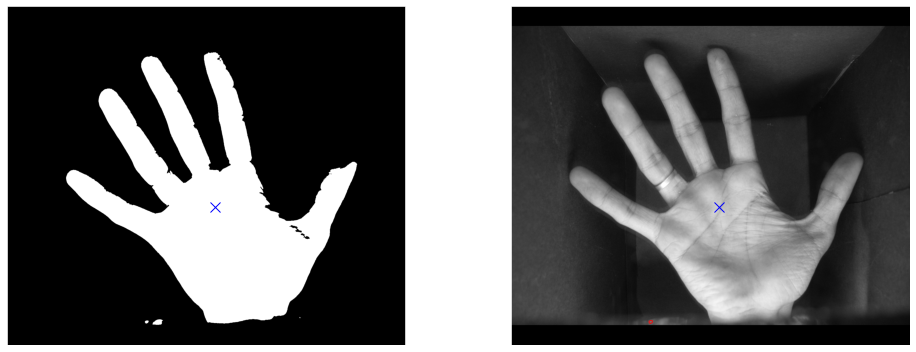

In [ ]:
M = cv2.moments(th)                                       




h, w = img.shape
x_c = M['m10'] // M['m00']
y_c = M['m01'] // M['m00']
plt.figure(figsize=(15,5))
plt.subplot(121)
show(th)
plt.plot(x_c, y_c, 'bx', markersize=10)
kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]]).astype(np.uint8)
erosion = cv2.erode(th,kernel,iterations=1)
boundary = th - erosion

cnt, _ = cv2.findContours(boundary, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
img_c = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cnt = cnt[0]
img_cnt = cv2.drawContours(img_c, [cnt], 0, (255,0,0), 2)
plt.subplot(122)
plt.plot(x_c, y_c, 'bx', markersize=10)
show(img_cnt)
plt.tight_layout()
plt.show()                                     #Centorid of mask is calcualted using moments M_10 and M_01 of the image.
                                                          #Edges are extracted by subtracting the erosion of the mask from itself. A 3x3 + shaped kernel is used for erosion.
                                                          #Outer boundary is detected using simple 8 connectivity.

cnt = cnt.reshape(-1,2)
left_id = np.argmin(cnt.sum(-1))
cnt = np.concatenate([cnt[left_id:,:], cnt[:left_id,:]])

The rotation of ROI is 14.04°


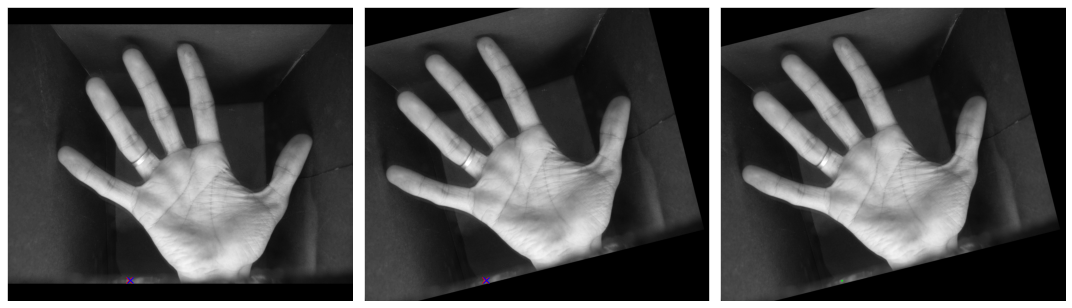

In [ ]:
minimas = cnt[np.where(sign_change>0)[0]]
v1, v2 = minimas[-1], minimas[0]
plt.figure(figsize=(15,5))
plt.subplot(131)
show(img)
plt.plot(v1[0], v1[1],'rx')
plt.plot(v2[0], v2[1],'bx')

plt.subplot(132)
theta = np.arctan2((v2-v1)[1], (v2-v1)[0])*180/np.pi
print('The rotation of ROI is {:.02f}\u00b0'.format(theta))
R = cv2.getRotationMatrix2D(tuple(v2),theta,1)
img_r = cv2.warpAffine(img,R,(w,h))
v1 = (R[:,:2] @ v1 + R[:,-1]).astype(np.int)
v2 = (R[:,:2] @ v2 + R[:,-1]).astype(np.int)
plt.plot(v1[0], v1[1],'rx')
plt.plot(v2[0], v2[1],'bx')
show(img_r)

ux = v1[0]
uy = v1[1] + (v2-v1)[0]//3
lx = v2[0]
ly = v2[1] + 4*(v2-v1)[0]//3
img_c = cv2.cvtColor(img_r, cv2.COLOR_GRAY2BGR)
cv2.rectangle(img_c, (lx,ly),(ux,uy),(0,255,0),2)
plt.subplot(133)
show(img_c)

plt.tight_layout()
plt.show()      

      #Rotate the image to align valley points horizontally and crop the Region of Interest.


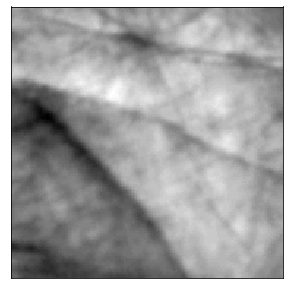

In [ ]:
roi = img_r[uy:ly,ux:lx]
plt.figure(figsize=(5,5))
show(roi)

 **Palm Print feature extraction...
let's implement the LTrP -> applied to a palmprint** 

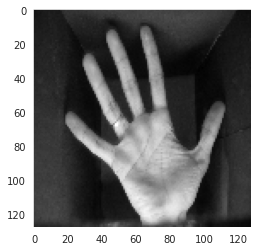

In [ ]:
import numpy as np, matplotlib.pyplot as plt, cv2
import time

im_side = 128 
image = cv2.imread('/content/IITD Palmprint V1/Left Hand/001_3.JPG')

image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (im_side, im_side))
image = np.array(image, dtype=np.float32)  # /255.

plt.imshow(image,cmap='gray')
plt.show()

In [ ]:
def derivate_image(im, angle):         #Compute Derivatives
    '''
    Compute derivative of input image
    :param im: input image. should be grayscale!
    :param angle: 0 or 90 degrees
    :return: computed derivative along that direction.
    includes padding...
    '''
    h, w = np.shape(im)
    pad_im = np.pad(im, (1, 0), 'edge')
    if angle == 'horizontal':  # horizontal derivative
        deriv_im = pad_im[1:, :w] - im  # [1:, :w]
    elif angle == 'vertical':
        deriv_im = pad_im[:h, 1:] - im  # [1:, :w]

    return deriv_im

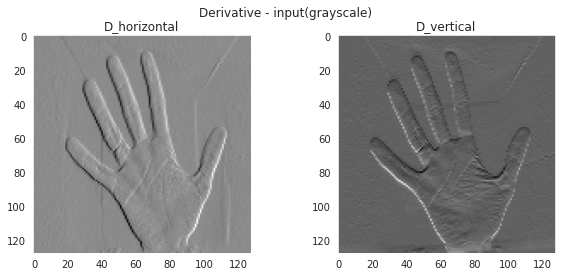

In [ ]:
deriv_h = derivate_image(im=image, angle='horizontal')
deriv_v = derivate_image(im=image, angle='vertical')

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.imshow(deriv_h,'gray')
plt.title('D_horizontal')
plt.subplot(122)
plt.imshow(deriv_v,'gray')
plt.title('D_vertical')
plt.suptitle('Derivative - input(grayscale)')
plt.show()

In [ ]:
###################################################################
def extract_ltrp1(im_d_x, im_d_y):
    """
    Extract LTrP1 code (4 orientations) by using input dx and dy matrices.
    """
    encoded_image = np.zeros(np.shape(im_d_y))  # define empty matrix, of the same shape as the image...

    # # apply conditions for each orientation...
    encoded_image[np.bitwise_and(im_d_x >= 0, im_d_y >= 0)] = 1
    encoded_image[np.bitwise_and(im_d_x < 0, im_d_y >= 0)] = 2
    encoded_image[np.bitwise_and(im_d_x < 0, im_d_y < 0)] = 3
    encoded_image[np.bitwise_and(im_d_x >= 0, im_d_y < 0)] = 4

    return encoded_image


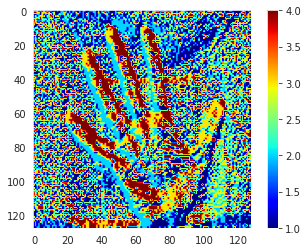

In [ ]:
ltrp1 = extract_ltrp1(im_d_x=deriv_h, im_d_y=deriv_v)

plt.imshow(ltrp1,'jet')
plt.colorbar()
plt.show()

In [ ]:
def extract_ltrp2(ltrp1_code, plotting_flag=True):      #extract P-component
    """
    Extracting the P-components for every pixel (g_c),
    """
    this_im_side = np.shape(ltrp1_code)[0]
    ltrp1_code = np.pad(ltrp1_code, (1, 1), 'constant', constant_values=0)
    g_c1 = np.zeros((3, this_im_side, this_im_side))
    g_c2 = np.zeros((3, this_im_side, this_im_side))
    g_c3 = np.zeros((3, this_im_side, this_im_side))
    g_c4 = np.zeros((3, this_im_side, this_im_side))

    for i in range(1, im_side+1):
        for j in range(1, im_side+1):
            g_c = ltrp1_code[i, j]import numpy as np, matplotlib.pyplot as plt, cv2
import timeimport numpy as np, matplotlib.pyplot as plt, cv2
import time
import albumentations as A
import cv2

# Declare an augmentation pipeline
transform = A.Compose([
    A.RandomCrop(width=700, height=496),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
])

# Read an image with OpenCV and convert it to the RGB colorspace
image = cv2.imread("/content/IITD Palmprint V1/Left Hand/001_1.JPG")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Augment an image
transformed = transform(image=image)
transformed_image = transformed["image"]
import albumentations as A
import cv2

# Declare an augmentation pipeline
transform = A.Compose([
    A.RandomCrop(width=700, height=496),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
])

# Read an image with OpenCV and convert it to the RGB colorspace
image = cv2.imread("/content/IITD Palmprint V1/Left Hand/001_1.JPG")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Augment an image
transformed = transform(image=image)
transformed_image = transformed["image"]

            # # extract neighborhood around g_c pixel
            neighborhood = np.array([ltrp1_code[i + 1, j], ltrp1_code[i + 1, j - 11], ltrp1_code[i, j - 11],
                                     ltrp1_import numpy as np, matplotlib.pyplot as plt, cv2
import time
import albumentations as A
import cv2

# Declare an augmentation pipeline
transform = A.Compose([
    A.RandomCrop(width=700, height=496),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
])

# Read an image with OpenCV and convert it to the RGB colorspace
image = cv2.imread("/content/IITD Palmprint V1/Left Hand/001_1.JPG")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Augment an image
transformed = transform(image=image)
transformed_image = transformed["image"]code[i - 1, j - 1], ltrp1_code[i - 1, j], ltrp1_code[i - 1, j + 1],
                                     ltrp1_code[i, j + 1], ltrp1_code[i + 1, j + 1]])
            # # determine the codes that are different from g_c
            mask = neighborhood != g_c
            # # apply mask
            ltrp2_local = np.multiply(neighborhood, mask)

            # # construct P-components for every orientation.
            if g_c == 1:
                for direction_index, direction in enumerate([2, 3, 4]):
                    g_dir = ltrp2_local == direction
                    g_c1[direction_index, i - 1, j - 1] = reduce(lambda a, b: 2 * a + b, np.array(g_dir, dtype=np.int))

            elif g_c == 2:
                for direction_index, direction in enumerate([1, 3, 4]):
                    g_dir = ltrp2_local == direction
                    g_c2[direction_index, i - 1, j - 1] = reduce(lambda a, b: 2 * a + b, np.array(g_dir, dtype=np.int))

            elif g_c == 3:
                for direction_index, direction in enumerate([1, 2, 4]):
                    g_dir = ltrp2_local == direction
                    g_c3[direction_index, i - 1, j - 1] = reduce(lambda a, b: 2 * a + b, np.array(g_dir, dtype=np.int))

            elif g_c == 4:
                for direction_index, direction in enumerate([1, 2, 3]):
                    g_dir = ltrp2_local == direction

                    g_c4[direction_index, i - 1, j - 1] = reduce(lambda a, b: 2 * a + b, np.array(g_dir, dtype=np.int))
                    pass

            elif g_c not in [1, 2, 3, 4]:
                raise Exception('Error - Invalid value for g_c. List of possible values include [1,2,3,4].')

    # # collect all P-components in a 'large_g_c'
    large_g_c = []
    for this_g_c in [g_c1, g_c2, g_c3, g_c4]:
        large_g_c.extend(this_g_c)
    large_g_c = np.array(large_g_c)

    if plotting_flag:
        map = 'gray'

        p_counter = 0
        p_code_counter = 0
        plt.figure(figsize=(16, 8))
        for index in range(12):
            plt.subplot(3, 4, index + 1)
            plt.imshow(large_g_c[index, :, :], cmap=map)
            plt.title('P%d - %d' % (p_counter + 1, p_code_counter + 1))

            p_counter += 1
            p_code_counter += 1

            if p_counter % 4 == 0:
                p_counter = 0
            if p_code_counter % 3 == 0:
                p_code_counter = 0
        plt.tight_layout()
        plt.show()

    return large_g_c

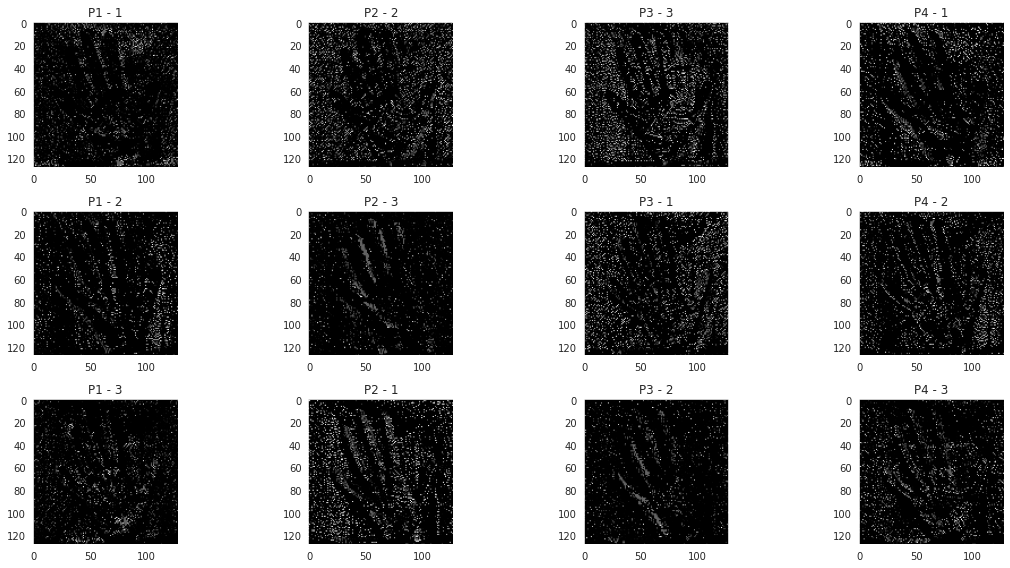

(12, 128, 128)


In [ ]:
from functools import reduce

plot_figures_flag=True

ltrp2 = extract_ltrp2(ltrp1_code=ltrp1, plotting_flag=plot_figures_flag)
print(np.shape(ltrp2))

**Image Augmentation**

In [ ]:
import numpy as np, matplotlib.pyplot as plt, cv2
import time
import albumentations as A
import cv2

# Declare an augmentation pipeline
transform = A.Compose([
    A.RandomCrop(width=700, height=496),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
])

# Read an image with OpenCV and convert it to the RGB colorspace
image = cv2.imread("/content/IITD Palmprint V1/Left Hand/001_1.JPG")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Augment an image
transformed = transform(image=image)
transformed_image = transformed["image"]

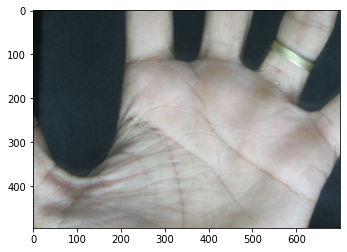

In [ ]:
plt.imshow(transformed_image,cmap='gray')
plt.show()

In [ ]:

import numpy as np
import random

import tensorflow as tf
import os
import matplotlib.image as mp
import re
import pandas as pd
from termcolor import colored
import sys
import cv2

sys.path.insert(0,'/content/Palmprint1/libs')


#from ./vgg_cnn_f import VGG_CNN_F
from vgg_cnn_f import VGG_CNN_F
import matplotlib.pyplot as plt

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

pic_dim = 224
class_dim = 230


def reduce_var(x, axis=None, keepdims=False):
    m = tf.reduce_mean(x, axis=axis, keep_dims=True)
    devs_squared = tf.square(x - m)
    return tf.reduce_mean(devs_squared, axis=axis, keep_dims=keepdims)


def reduce_std(x, axis=None, keepdims=False):
    return tf.sqrt(reduce_var(x, axis=axis, keepdims=keepdims))


def get_class(name):
    Chot = np.array([0.0] * class_dim)
    Chot[int(name)] = 1.0
    return Chot


def get_class_number(name):
    res = re.findall('[0-9]+', name)

    return int(res[0]) - 1

def data_gen(X, batch_size):
    l = len(X)
    ret = []
    k = l//batch_size
    
def data_gen(X, batch_size):
    l = len(X)
    ret = []
    k = l//batch_size
    for i in range(0, k):
        data = []
        label = []
        for j in range(i*batch_size, (i+1)*batch_size):
            img = cv2.imread(X[j][0], 1)
            img = cv2.resize(img, (224, 224), interpolation = cv2.INTER_NEAREST)
            data.append(img.astype('float64'))
            label.append(X[j][1])
        yield (data, label)

batch_size = 20

image = tf.placeholder(tf.float32, [None, 224, 224, 3])
image = tf.div(tf.subtract(image, tf.reduce_mean(image)), reduce_std(image))

labels = tf.placeholder(tf.float32, [None, 230])
net = VGG_CNN_F({'data': image})

fc7 = net.layers['fc7']

print (fc7.shape)
with tf.variable_scope("kunwar", reuse=tf.AUTO_REUSE):

 w1 = tf.Variable(tf.random_normal(shape=[4096, 100], mean=0, stddev=2 / np.sqrt(4096)), name='feature_layer')
 b1 = tf.Variable(tf.zeros([100]), name='feature_layer_bias')
 output = tf.matmul(fc7, w1) + b1
 w = tf.Variable(tf.random_normal(shape=[100, 230], mean=0, stddev=2 / np.sqrt(100)), name='last_W')
 b = tf.Variable(tf.zeros([230]), name='last_b')
 output1 = tf.matmul(output, w) + b

 prediction = tf.nn.softmax(output1) #eval

 cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=output1))
 tf.summary.scalar('Cost', cost)
 opt = tf.train.AdamOptimizer(learning_rate=0.00004)
 train_op = opt.minimize(cost)
 #evaluate model
 correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(labels, 1))
 accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))


merged = tf.summary.merge_all()
saver = tf.train.Saver()
init = tf.initialize_all_variables()

epoch = 20
save_path = './log/weights/cnn_f_IITD_fine_tune.ckpt'
log_path = './log/summaries/IITD/'
extract = True
step = 0
loadw = False
train = True

acc_list =[]
loss_list = []

with tf.Session() as sess:
    summary_writer = tf.summary.FileWriter(log_path, sess.graph)
    
    sess.run(tf.global_variables_initializer())
    if train:
        image_paths = [
            ['/content/IITD Palmprint V1/Left Hand/' + name, get_class(get_class_number(name))]
            for name in os.listdir('/content/IITD Palmprint V1/Left Hand/')
        ]
        train_data, test_data = image_paths[:(len(image_paths)*70)//100], image_paths[(len(image_paths)*30)//100 :]
        %%shell
        for i in range(epoch):
            random.shuffle(train_data)
            j = 0
            for xb, yb in data_gen(train_data, batch_size):
                _, c = sess.run([train_op, cost], feed_dict={image: xb, labels: yb})
                # print(np.array(yb).shape, xb[0].shape)
                # if step % 5 == 0:
                summary = sess.run(merged, feed_dict={image: xb, labels: yb})
                #summary_writer.add_summary(summary, step)
               # print (colored('Summaries were updated.', 'magenta'))
                acc = sess.run(accuracy, feed_dict={image: xb, labels: yb})

                if step % 100 == 0:
                    saver.save(sess, save_path)
                    print (colored('Model was saved.', 'magenta'))
                step += 1
                acc_list.append(acc)
                loss_list.append(c)
                # acc = sess.run(accuracy, feed_dict={image: xb, labels: yb})
                print (colored('Epoch:', 'magenta'), i + 1, '|', colored('Batch:', 'blue'), j + 1, '|', colored('Cost:',
                                                                                                             'green'), c, '|', 'acc ', acc*100)
                print ('_____________________________')
                j += 1
        saver.save(sess, save_path)
        print (colored('Model was saved.', 'magenta'))

        for x_test, y_test in data_gen(test_data, len(test_data)):
            acc = acc = sess.run(accuracy, feed_dict={image: x_test, labels: y_test})
            print('model accuracy : ' , acc*100) 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.




Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor

(?, 6, 6, 256)

(?, 4096)
(?, 4096)

(?, 4096)
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Model was saved.
Epoch: 1 | Batch: 1 | Cost: 18.27405 | acc  0.0
_____________________________
Epoch: 1 | Batch: 2 | Cost: 24.985725 | acc  0.0
_____________________________
Epoch: 1 | Batch: 3 | Cost: 28.808125 | acc  0.0
_____________________________
Epoch: 1 | Batch: 4 | Cost: 27.169647 | acc  0.0
_____________________________
Epoch: 1 | Batch: 5 | Cost: 29.22135 | acc  0.0
_____________________________
Epoch: 1 | Batch: 6 | Cost: 23.435043 | acc  0.0
____________________________

Text(0, 0.5, 'Accuracy')

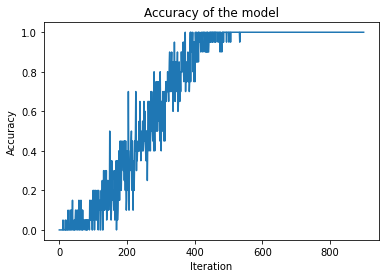

In [ ]:
import matplotlib.pyplot as plt
plt.plot(acc_list)
plt.title('Accuracy of the model')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

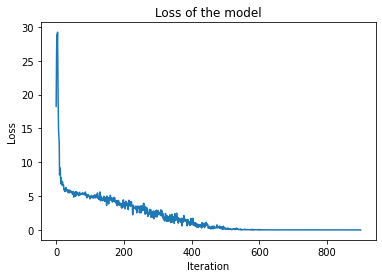

In [ ]:
plt.plot(loss_list)
plt.title('Loss of the model')
plt.xlabel('Iteration')
plt.ylabel('Loss')